In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd

2025-07-01 09:37:58.314533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751362678.552740      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751362678.623717      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('/kaggle/input/titanic-classification-models/predictions.csv')

In [4]:
# Target variable (what you're predicting)
target = to_categorical(data['Survived'])  # convert to one-hot encoded vectors
# Predictors (everything except 'Survived')
predictors = data.drop(['Survived'], axis=1).values
n_cols = predictors.shape[1]


In [5]:
# Build the model
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='softmax')) #output layer with 2 outcomes: 2 nodes/neurons

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(predictors,target,epochs=15)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-01 09:38:14.475630: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5080 - loss: 8146.6367 
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6169 - loss: 0.6907 
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.6889 
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - loss: 0.6896 
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5689 - loss: 0.6893 
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 0.6896 
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5624 - loss: 0.6886 
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5619 - loss: 0.6883 
Epoch 9/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 0.6873 
Epoch 10/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5722 - loss: 0.6864 
Epoch 11/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5410 - loss: 0.6899 
Epoch 12/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5533 -

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model.save('/kaggle/working/titanic_model.h5')
my_model=load_model('/kaggle/working/titanic_model.h5')
predictions=my_model.predict(predictors)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [8]:
probability_true=predictions[:,1]
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,694 (6.62 KB)

 Trainable params: 1,692 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
print(probability_true)

[0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294
 0.46137294 0.46137294 0.46137294 0.46137294 0.46137294 0.4613

In [10]:
input_shape = (predictors.shape[1],)
def get_new_model(input_shape=input_shape):
    model=Sequential()
    model.add(Dense(50,activation='relu',input_shape=input_shape))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(2,activation='softmax')) #output layer with 2 outcomes: 2 nodes/neurons
    return(model)

In [11]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001,0.01,1.0]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(learning_rate=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target,epochs=5)



Testing model with learning rate: 0.000001

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6907  
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7187 
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6961 
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7814 
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7030 


Testing model with learning rate: 0.010000

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4715.6421
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6928 
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6910 
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6891 
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6912 


Testing model with learning rate: 1.000000

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2480969728.0000
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6887 
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7108 
Epoch 

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=my_optimizer,loss='categorical_crossentropy')

early_stop_monitor=EarlyStopping(patience=5)
model.fit(predictors,target,epochs=20,validation_split=0.3,callbacks=[early_stop_monitor])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.6802 - val_loss: 0.7393
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7095 - val_loss: 0.6898
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6889 - val_loss: 0.6868
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6896 - val_loss: 0.6913
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6910 - val_loss: 0.6952
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6810 - val_loss: 0.7789
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7228 - val_loss: 0.6857
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6983 - val_loss: 0.6851
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6947 - val_loss: 0.7130
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6997 - val_loss: 0.6890
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6891 - val_loss: 0.6876
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6812 - val

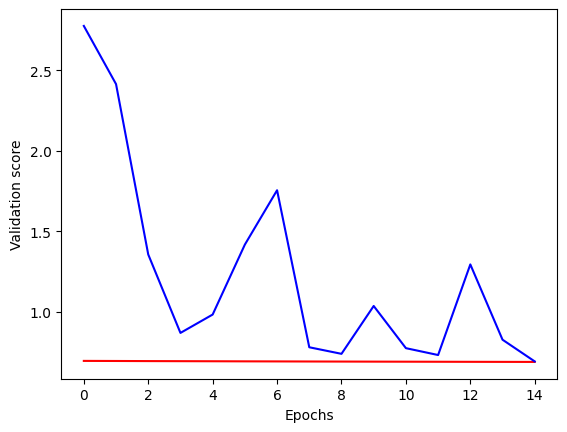

In [17]:
import matplotlib.pyplot as plt
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(10,activation='relu',input_shape=(n_cols,)))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation='softmax',input_shape=(n_cols,)))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()